Nama : Adinda Rizka Hamdasati

NIM : 24060122140139

Praktikum ML C1

1. Memuat Dataset Iris dan Visualisasi Data


In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Memuat dataset Iris
iris = load_iris()

# Mengambil fitur ke-2 (Sepal Width) dan ke-3 (Petal Length)
X = iris.data[:, [1, 2]]

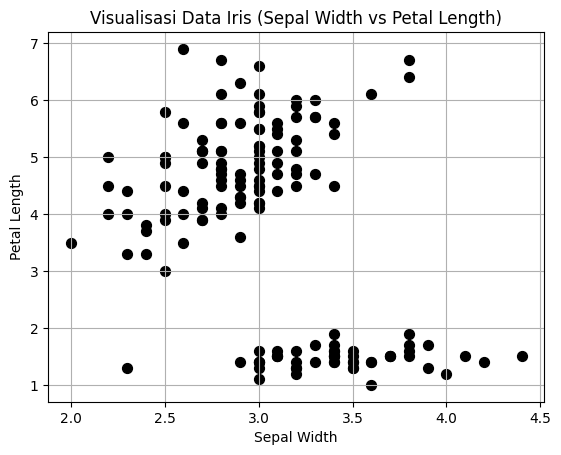

In [5]:
# Visualisasi data sebelum clustering
plt.scatter(X[:, 0], X[:, 1], c='black', s=50)
plt.title("Visualisasi Data Iris (Sepal Width vs Petal Length)")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

Pada kode pertama, dataset Iris dimuat menggunakan fungsi load_iris() dari pustaka sklearn.datasets, yang sudah menyediakan data bunga Iris lengkap dengan berbagai fitur. Dalam hal ini, hanya dua fitur yang digunakan untuk clustering, yaitu Sepal Width (fitur ke-2) dan Petal Length (fitur ke-3). Fitur-fitur ini dipilih karena keduanya memiliki karakteristik yang relevan untuk melihat bagaimana bunga Iris dapat dikelompokkan berdasarkan ukuran sepal dan petal mereka. Setelah memilih dua fitur tersebut, data divisualisasikan dengan menggunakan scatter plot untuk menggambarkan bagaimana titik data tersebar di dalam ruang dua dimensi yang dibentuk oleh kedua fitur ini. Grafik ini membantu untuk melihat apakah ada pola yang jelas dalam data yang bisa digunakan untuk melakukan clustering.

2. Evaluasi Hasil Clustering Menggunakan Inertia (SSE) dan Silhouette Coefficient



In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

SSE = []
sil_scores = []
for k in range(1, 11):  # Evaluasi untuk K=1 hingga K=10
    # Define the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit the KMeans model with the input data
    kmeans.fit(X)  # X adalah data dengan fitur 2 dan 3 (Sepal Width dan Petal Length)

    # Calculate inertia (SSE) for the current K
    inertia = kmeans.inertia_
    SSE.append(inertia)

    # Calculate the silhouette coefficient
    if k > 1:  # Silhouette coefficient is only valid for k > 1
        sil_score = silhouette_score(X, kmeans.labels_)
        sil_scores.append(sil_score)

    # Print results for current K
    print(f"n-cluster = {k}, Inertia (SSE) = {inertia}")
    if k > 1:
        print(f"Silhouette Coefficient = {sil_score}")


n-cluster = 1, Inertia (SSE) = 492.6323333333334
n-cluster = 2, Inertia (SSE) = 86.31064765300054
Silhouette Coefficient = 0.7392862954615389
n-cluster = 3, Inertia (SSE) = 40.73707409220729
Silhouette Coefficient = 0.5933477102522363
n-cluster = 4, Inertia (SSE) = 27.57402222222222
Silhouette Coefficient = 0.5613876733762976
n-cluster = 5, Inertia (SSE) = 23.759754764553204
Silhouette Coefficient = 0.5109488314206775
n-cluster = 6, Inertia (SSE) = 20.448378138528128
Silhouette Coefficient = 0.49238601982259195
n-cluster = 7, Inertia (SSE) = 16.282159090909094
Silhouette Coefficient = 0.37311372450360153
n-cluster = 8, Inertia (SSE) = 16.834071114055792
Silhouette Coefficient = 0.3766796940166772
n-cluster = 9, Inertia (SSE) = 15.983369359669824
Silhouette Coefficient = 0.3430730545265206
n-cluster = 10, Inertia (SSE) = 12.843462268891711
Silhouette Coefficient = 0.3693142175559121


Pada kode kedua, dilakukan evaluasi hasil clustering menggunakan dua metrik utama, yaitu Inertia (SSE) dan Silhouette Coefficient. Inertia (SSE) dihitung menggunakan kmeans.inertia_, yang mengukur sejauh mana titik data berada dekat dengan centroid cluster mereka. Semakin rendah nilai Inertia, semakin baik kualitas clustering yang dihasilkan. Selain itu, Silhouette Coefficient dihitung menggunakan silhouette_score(X, kmeans.labels_) untuk mengevaluasi seberapa baik pemisahan antar cluster. Nilai yang lebih tinggi menunjukkan pemisahan yang lebih jelas antara cluster. Metrik ini hanya dihitung untuk K > 1 karena tidak dapat dihitung untuk satu cluster. Hasil evaluasi ini membantu menilai kualitas clustering yang dilakukan dengan berbagai nilai K.

3. Menentukan Jumlah K dengan Elbow Method

n-cluster = 1, Inertia (SSE) = 492.6323333333334
n-cluster = 2, Inertia (SSE) = 86.31064765300054
Silhouette Coefficient = 0.7392862954615389
n-cluster = 3, Inertia (SSE) = 40.73707409220729
Silhouette Coefficient = 0.5933477102522363
n-cluster = 4, Inertia (SSE) = 27.57402222222222
Silhouette Coefficient = 0.5613876733762976
n-cluster = 5, Inertia (SSE) = 23.759754764553204
Silhouette Coefficient = 0.5109488314206775
n-cluster = 6, Inertia (SSE) = 20.448378138528128
Silhouette Coefficient = 0.49238601982259195
n-cluster = 7, Inertia (SSE) = 16.282159090909094
Silhouette Coefficient = 0.37311372450360153
n-cluster = 8, Inertia (SSE) = 16.834071114055792
Silhouette Coefficient = 0.3766796940166772
n-cluster = 9, Inertia (SSE) = 15.983369359669824
Silhouette Coefficient = 0.3430730545265206
n-cluster = 10, Inertia (SSE) = 12.843462268891711
Silhouette Coefficient = 0.3693142175559121


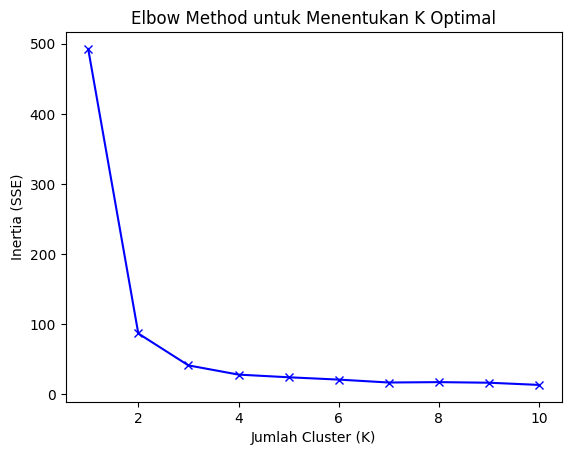

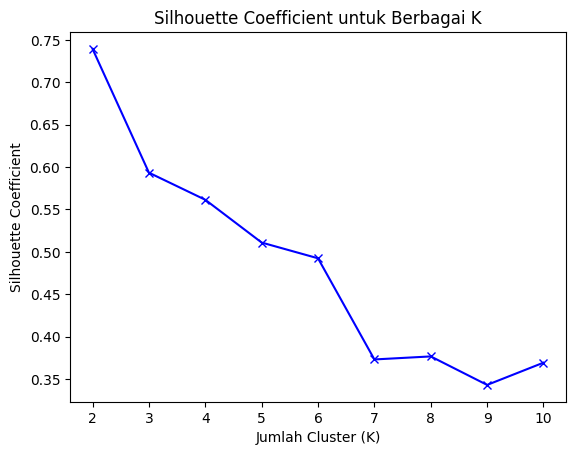

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []  # Untuk menyimpan Inertia (SSE)
sil_scores = []  # Untuk menyimpan Silhouette Coefficient

# Evaluasi untuk K=1 hingga K=10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)  # X adalah data dengan fitur 2 dan 3 (Sepal Width dan Petal Length)

    # Hitung inertia (SSE) untuk K yang sedang diuji
    inertia = kmeans.inertia_
    SSE.append(inertia)

    # Hitung Silhouette Coefficient untuk k > 1
    if k > 1:
        sil_score = silhouette_score(X, kmeans.labels_)
        sil_scores.append(sil_score)

    # Print hasil untuk K yang sedang diuji
    print(f"n-cluster = {k}, Inertia (SSE) = {inertia}")
    if k > 1:
        print(f"Silhouette Coefficient = {sil_score}")

# Plot Elbow Method (SSE) untuk menentukan K optimal
plt.plot(range(1, 11), SSE, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.show()

# Plot Silhouette Coefficient untuk berbagai K
plt.plot(range(2, 11), sil_scores, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient untuk Berbagai K')
plt.show()


Pada kode ketiga, Elbow Method digunakan untuk menentukan jumlah cluster optimal. Untuk setiap nilai K (dari 1 hingga 10), kita menghitung Inertia (SSE) dan Silhouette Coefficient, yang memberi gambaran tentang kualitas pemisahan antar cluster. Grafik Elbow Method menunjukkan bagaimana Inertia berubah dengan bertambahnya jumlah cluster. Titik elbow pada grafik menunjukkan jumlah cluster optimal, yang dipilih berdasarkan penurunan Inertia yang melambat. Grafik kedua memplot Silhouette Coefficient untuk berbagai nilai K untuk mengevaluasi kualitas pemisahan antar cluster. Dengan kedua grafik ini, kita bisa memilih jumlah cluster yang optimal berdasarkan baik Inertia maupun Silhouette Coefficient.

4. Plot Hasil Cluster dengan Nilai K yang Dipilih

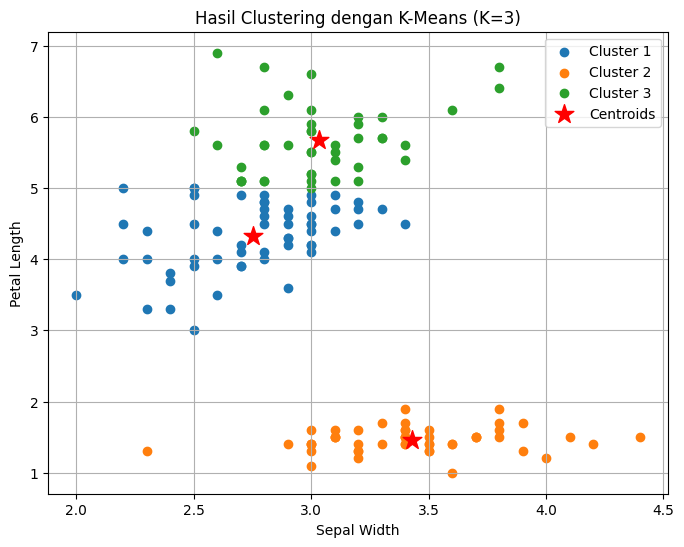

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tentukan jumlah cluster berdasarkan Elbow Method (misalnya K=3)
optimal_k = 3  # Gantilah K ini sesuai dengan hasil Elbow Method atau evaluasi lainnya

# Melakukan clustering dengan K=optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
kmeans.fit(X)  # X adalah data dengan fitur 2 dan 3 (Sepal Width dan Petal Length)

# Mendapatkan label dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# Loop untuk memplot setiap cluster
for cluster in range(optimal_k):
    plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1], label=f'Cluster {cluster + 1}')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='red', s=200, label='Centroids')

# Menambahkan judul, label sumbu, dan legenda
plt.title(f"Hasil Clustering dengan K-Means (K={optimal_k})")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


Pada kode keempat, setelah menentukan jumlah cluster yang optimal (misalnya K=3 berdasarkan hasil Elbow Method), dilakukan clustering ulang dengan K=3 menggunakan K-Means. Hasil clustering kemudian divisualisasikan menggunakan scatter plot. Setiap titik data diberi warna yang sesuai dengan cluster yang ditugaskan oleh model. Centroid dari setiap cluster digambarkan dengan simbol bintang merah besar untuk menunjukkan posisi rata-rata titik data dalam cluster tersebut. Visualisasi ini memberikan gambaran yang jelas tentang bagaimana data terkelompok berdasarkan kesamaan fitur dan memberikan informasi mengenai distribusi titik data di dalam setiap cluster.